In [219]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA
from sklearn.decomposition import TruncatedSVD, DictionaryLearning, FactorAnalysis
from sklearn.decomposition import FastICA, NMF, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [223]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [224]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [225]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [226]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

In [8]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"seungminyang","key":"549726514c6a79a6bdac8b65d15e60ed"}'}

In [9]:
ls -1ha kaggle.json

kaggle.json


In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        279           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        114           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        362           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2376           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      18279           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4702           False  
connectx

In [82]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 57.3MB/s]


In [93]:
!ls

Coronahack-Chest-XRay-Dataset  mobile-price-classification.zip	test.csv
kaggle.json		       sample_data			train.csv


In [92]:
!unzip mobile-price-classification.zip

Archive:  mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [210]:
mobile = pd.read_csv('train.csv', encoding='utf-8')
mobile_test = pd.read_csv('test.csv', encoding='utf-8')

In [95]:
mobile

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [273]:
values = mobile.values
values[:, :-2]

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 1.900e+01, 0.000e+00,
        0.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 7.000e+00, 1.000e+00,
        1.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 9.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 5.000e+00, 1.000e+00,
        1.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.900e+01, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 2.000e+00, 1.000e+00,
        1.000e+00]])

In [274]:
values[:,-1]

array([1., 2., 2., ..., 3., 0., 3.])

In [275]:
mobile.keys()

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [276]:
mobile_data = values[:, :-1]
mobile_target = values[:,-1]
test_data = mobile_test.values[:, :-1]
test_target = mobile_test.values[:, -1]

In [197]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [198]:
cross_val = cross_validate(
    estimator = model,
    X = mobile_data, y = mobile_target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.379400634765625 (+/- 0.010230292008066277)
avg score time: 0.014814281463623047 (+/- 0.0005440954274859465)
avg test score: 0.8714999999999999 (+/- 0.011789826122551604)


In [277]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [278]:
cross_val = cross_validate(
    estimator = model,
    X = mobile_data, y = mobile_target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01474313735961914 (+/- 0.0005725443824541307)
avg score time: 0.0008639812469482422 (+/- 4.77807488217784e-05)
avg test score: 0.826 (+/- 0.008746427842267968)


In [200]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [201]:
cross_val = cross_validate(
    estimator = model,
    X = mobile_data, y = mobile_target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.26714911460876467 (+/- 0.006020892214641139)
avg score time: 0.01817011833190918 (+/- 0.00048422859197507596)
avg test score: 0.8515 (+/- 0.014106735979665885)


In [202]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [281]:
n_classes = 3
n_estimators = 40
cmap = plt.cm.RdYlBu
plot_step = .02
plot_step_coarser = .5
RANDOM_SEED = 10

In [282]:
plot_idx = 1
models = [RandomForestClassifier(n_estimators=n_estimators),
         ExtraTreesClassifier(n_estimators=n_estimators)]

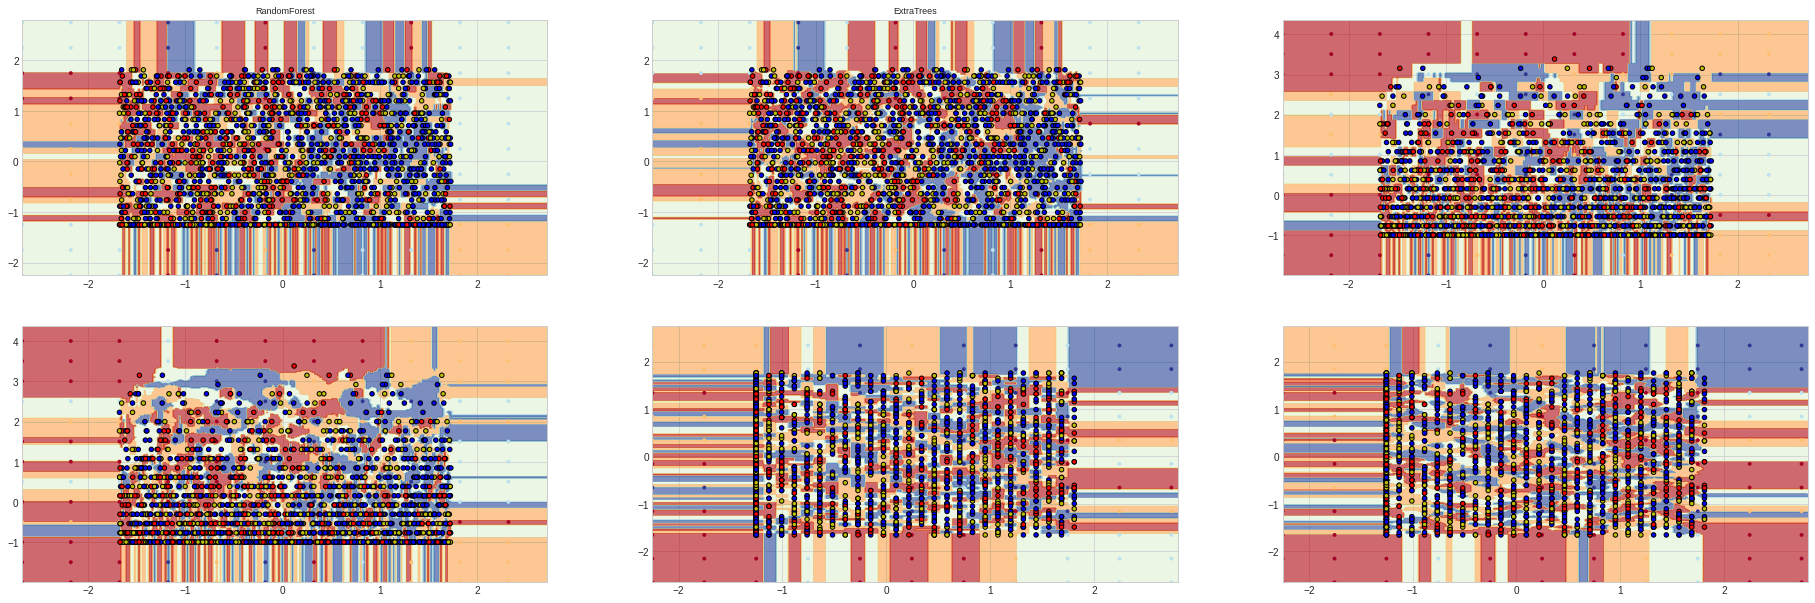

In [283]:
plt.figure(figsize=(32,16))

for pair in ([0,2],[0,4],[2,6]):
  for model in models:
    X = mobile_data[:, pair]
    y = mobile_target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X-mean)/std

    model.fit(X, y)

    model_title = str(type(model)).split('.')[-1][:-2][:-len('Classifier')]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy =  np.meshgrid(np.arange(x_min, x_max, plot_step),
                          np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                            c=Z_points_coarser, cmap=cmap,
                            edgecolor='none')
    plt.scatter(X[:,0], X[:,1], c=y,
                cmap = ListedColormap(['r', 'y', 'b']),
                edgecolors='k', s=20)
    plot_idx += 1

In [206]:
mobile_df = pd.DataFrame(mobile_data, columns=mobile.keys()[:-1])

In [207]:
mobile_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


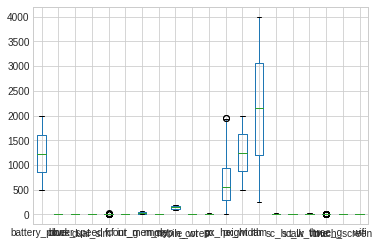

In [208]:
mobile_df.boxplot();

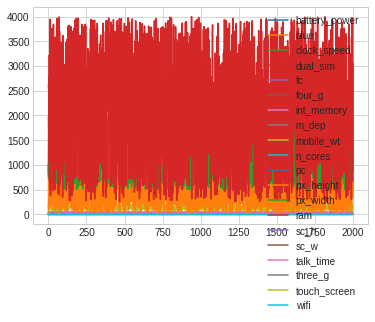

In [209]:
mobile_df.plot();

In [236]:
X_train, X_test, y_train, y_test = train_test_split(mobile_data, mobile_target, test_size=.2, random_state=123)
dtrain = xgb.DMatrix(data = X_train, label=y_train)
dtest = xgb.DMatrix(data = X_test, label=y_test)

In [238]:
params = {
    'max_depth':3,
    'eta':.1,
    'eval_metric':'logloss',
    'early_stopping':100
}
num_rounds=200

In [239]:
evals = [(dtrain, 'train'),(dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,
                      early_stopping_rounds=100, evals=evals)

[0]	train-logloss:-0.14114	eval-logloss:-0.156091
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:-1.35379	eval-logloss:-1.37268
[2]	train-logloss:-18.3476	eval-logloss:-18.3469
[3]	train-logloss:-23.4276	eval-logloss:-24.5935
[4]	train-logloss:-25.0677	eval-logloss:-25.6437
[5]	train-logloss:-25.6067	eval-logloss:-26.4609
[6]	train-logloss:-26.6184	eval-logloss:-27.4947
[7]	train-logloss:-26.7469	eval-logloss:-27.6075
[8]	train-logloss:-26.9247	eval-logloss:-27.7892
[9]	train-logloss:-26.9802	eval-logloss:-28.0407
[10]	train-logloss:-27.0534	eval-logloss:-28.0569
[11]	train-logloss:-27.0993	eval-logloss:-28.1431
[12]	train-logloss:-27.1259	eval-logloss:-28.1505
[13]	train-logloss:-27.1335	eval-logloss:-28.1589
[14]	train-logloss:-27.1416	eval-logloss:-28.167
[15]	train-logloss:-27.1501	eval-logloss:-28.1735
[16]	train-logloss:-27.2792	eval-logloss:-28.2614
[17]	train

In [240]:
import numpy as np

predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10], 3))

[1.143 2.786 3.114 0.522 2.839 3.137 0.997 0.076 0.046 1.222]


In [247]:
preds = []

for x in predicts:
  if x > 2.5:
    x = 3
    preds.append(x)
  elif x > 1.5:
    x = 2
    preds.append(x)
  elif x > 0.5:
    x = 1
    preds.append(x)
  else:
    x = 0
    preds.append(x)

print(preds[:10])

[1, 3, 3, 1, 3, 3, 1, 0, 0, 1]


In [259]:
print('정확도: {}'.format(accuracy_score(y_test, preds)))
print('정밀도: {}'.format(precision_score(y_test, preds, average='macro')))
print('재현율: {}'.format(recall_score(y_test, preds, average='macro')))

정확도: 0.915
정밀도: 0.9144535588975963
재현율: 0.9188683493304894


In [262]:
import graphviz
import matplotlib.pyplot as plt

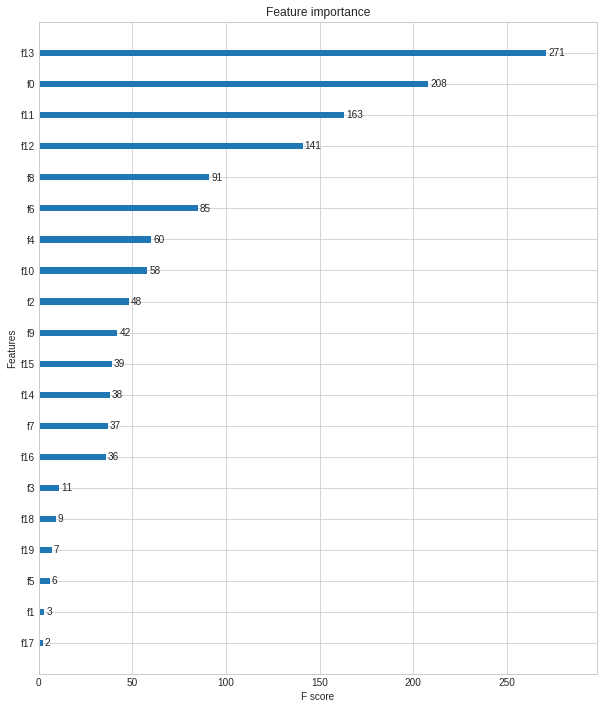

In [260]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax);

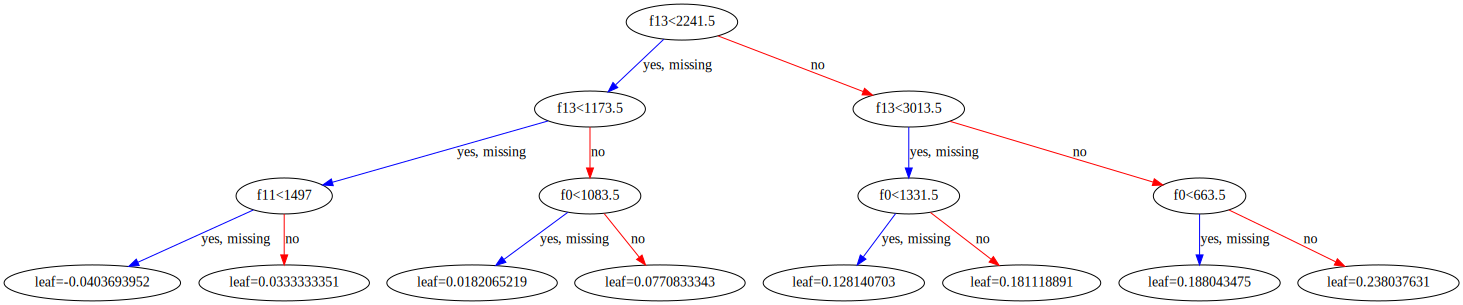

In [263]:
dot_data = xgb.to_graphviz(xgb_model)
graph = graphviz.Source(dot_data)
graph

In [264]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

In [265]:
X_train, X_test, y_train, y_test = train_test_split(mobile_data, mobile_target, test_size=.2, random_state=123)

In [266]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbmc.predict(X_test)

[1]	valid_0's multi_logloss: 1.25664	valid_0's multi_logloss: 1.25664
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 1.14963	valid_0's multi_logloss: 1.14963
[3]	valid_0's multi_logloss: 1.05392	valid_0's multi_logloss: 1.05392
[4]	valid_0's multi_logloss: 0.975759	valid_0's multi_logloss: 0.975759
[5]	valid_0's multi_logloss: 0.906855	valid_0's multi_logloss: 0.906855
[6]	valid_0's multi_logloss: 0.846438	valid_0's multi_logloss: 0.846438
[7]	valid_0's multi_logloss: 0.794205	valid_0's multi_logloss: 0.794205
[8]	valid_0's multi_logloss: 0.7466	valid_0's multi_logloss: 0.7466
[9]	valid_0's multi_logloss: 0.702039	valid_0's multi_logloss: 0.702039
[10]	valid_0's multi_logloss: 0.66511	valid_0's multi_logloss: 0.66511
[11]	valid_0's multi_logloss: 0.629322	valid_0's multi_logloss: 0.629322
[12]	valid_0's multi_logloss: 0.596897	valid_0's multi_logloss: 0.596897
[13]	valid_0's multi_logloss: 0.565845	valid_0's multi_logloss: 0.565845
[14]	vali

In [267]:
cross_val = cross_validate(
    estimator = lgbmc,
    X = mobile_data, y=mobile_target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 1.4355229377746581 (+/- 0.02813092660548599)
avg score time: 0.03271260261535645 (+/- 0.000755989766495706)
avg test score: 0.9115 (+/- 0.013379088160259667)


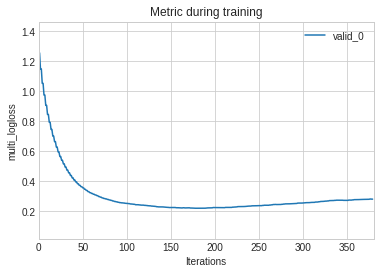

In [268]:
plot_metric(lgbmc);

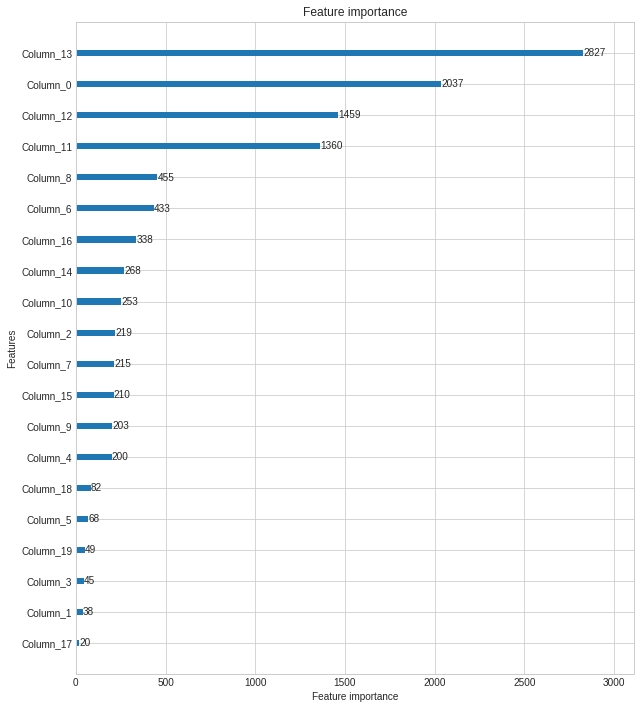

In [269]:
plot_importance(lgbmc,figsize=(10,12));

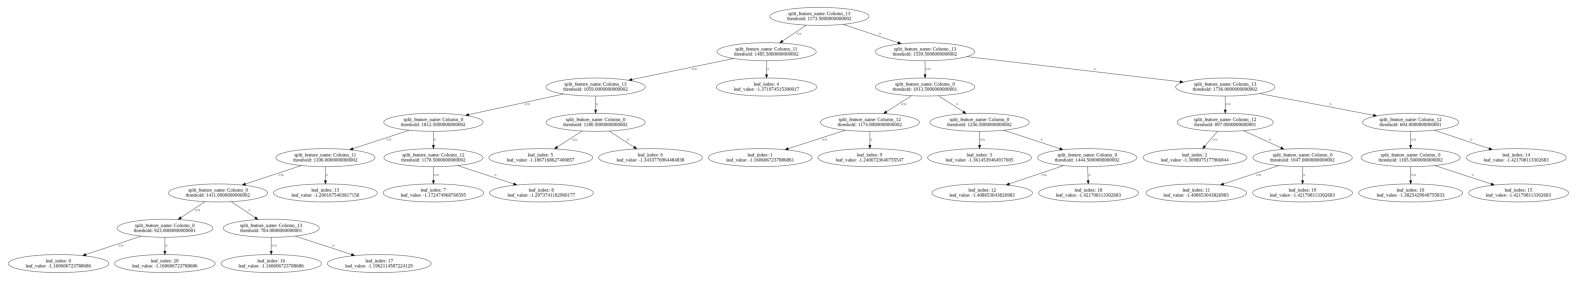

In [270]:
plot_tree(lgbmc, figsize=(28, 24));